In [1]:
import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten
from keras.preprocessing import  sequence
import glob
import keras.layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from scipy import stats
from sklearn.utils import resample
from collections import defaultdict

In [2]:
root_dir = glob.glob('/Users/jaredperez/Portfolio Project 3 Exam Performance/Data/Data/*/*/*')
file_names = ['info', 'tags']

In [3]:
#Delete erroneous info.txt and tags.csv files
for files in root_dir:
    if os.path.splitext(os.path.basename(files))[0] in file_names:
        x=files
        os.remove(x)

In [4]:
#Load the Data and attach labels to each of the files for each exam

def data_upload(x):
    dfs={"IBI": [],
     "ACC":[],
     'EDA':[],
     'HR':[],
     'TEMP':[],
     'BVP':[]}
    for files in glob.glob('/Users/jaredperez/Portfolio Project 3 Exam Performance/Data/Data/*/*/*'):
        key = os.path.splitext(os.path.basename(files))[0]
        df=pd.read_csv(files, header=None, skiprows=[0,1], on_bad_lines='skip')
        df['Subject']=files.split('/')[-3]
        df['Test']=files.split('/')[-2]
        dfs[key].append(df)
    return dfs

In [5]:
dfs=data_upload('x')

In [8]:
final_dfs = defaultdict(dict) #Concatenate dfs by sensor and test
for key, value in dfs.items():
    df_dict = defaultdict(list) #test(midterm 2, etc) didn't exist, so defaultdict(list) allows creation of key "Test"
    for df in value:
        df_dict[df['Test'].iloc[0]].append(df) 
    for test, df_group in df_dict.items(): #test key is midterm 1/2/final
        final_dfs[key][test] = pd.concat(df_group)

In [11]:
def map_values(row):
    test = row['Test']
    subject = row['Subject']
    return scores[test][subject] #scores=name of scores variable

In [12]:
midterm_1={'S1' : 78/100,
           'S2' : 82/100,
           'S3' : 77/100,
           'S4' : 75/100,
           'S5' : 67/100,
           'S6' : 71/100,
           'S7' : 64/100,
           'S8' : 92/100,
           'S9' : 80/100,
           'S10' : 89/100}



midterm_2={'S1' : 82/100,
           'S2' : 85/100,
           'S3' : 90/100,
           'S4' : 77/100,
           'S5' : 77/100,
           'S6' : 64/100,
           'S7' : 33/100,
           'S8' : 88/100,
           'S9' : 39/100,
           'S10' : 64/100}



final={'S1' : 182/200,
       'S2' : 180/200,
       'S3' : 188/200,
       'S4' : 149/200,
       'S5' : 157/200,
       'S6' : 175/200,
       'S7' : 110/200,
       'S8' : 184/200,
       'S9' : 126/200,
       'S10' : 116/200}


scores=defaultdict(dict)
scores['Midterm 1']=midterm_1
scores['Midterm 2']=midterm_2
scores['Final']=final

In [14]:
midterm_1_scores=list(scores['Midterm 1'].values())
midterm_2_scores=list(scores['Midterm 2'].values())
final_scores=list(scores['Final'].values())

In [15]:
def print_subject_score_max(test): #Functions to provide subject who performed worst/best on tests
    keys=list(scores[test].keys())
    values=list(scores[test].values())
    max_value=max(values)
    index=values.index(max_value)
    return keys[index]

def print_subject_score_min(test):
    keys=list(scores[test].keys())
    values=list(scores[test].values())
    min_value=min(values)
    index=values.index(min_value)
    return keys[index]

In [17]:
print(f"Midterm 1 mean value is {np.mean(midterm_1_scores)}")
print(f"Midterm 2 mean value is {np.mean(midterm_2_scores)}")
print(f"Final mean value is {np.mean(final_scores)}")

print(f"Midterm 1 Max value is {(max(list(scores['Midterm 1'].values())))} and belongs to {print_subject_score_max('Midterm 1')}")
print(f"Midterm 2 Max value is {(max(list(scores['Midterm 2'].values())))} and belongs to {print_subject_score_max('Midterm 2')}")
print(f"Midterm 1 Max value is {(max(list(scores['Final'].values())))} and belongs to {print_subject_score_max('Final')}")


print(f"Midterm 1 Min value is {(min(list(scores['Midterm 1'].values())))} and belongs to {print_subject_score_min('Midterm 1')}")
print(f"Midterm 2 Min value is {(min(list(scores['Midterm 2'].values())))} and belongs to {print_subject_score_min('Midterm 2')}")
print(f"Midterm 1 Min value is {(min(list(scores['Final'].values())))} and belongs to {print_subject_score_min('Final')}")

Midterm 1 mean value is 0.775
Midterm 2 mean value is 0.699
Final mean value is 0.7835
Midterm 1 Max value is 0.92 and belongs to S8
Midterm 2 Max value is 0.9 and belongs to S3
Midterm 1 Max value is 0.94 and belongs to S3
Midterm 1 Min value is 0.64 and belongs to S7
Midterm 2 Min value is 0.33 and belongs to S7
Midterm 1 Min value is 0.55 and belongs to S7


In [18]:
for key, value in final_dfs.items():
    for df, value2 in value.items():
        value2['Score']=value2.apply(map_values, axis=1)

In [9]:
%store final_dfs

UsageError: Unknown variable 'final_dfs'


In [3]:
%store -r final_dfs


In [4]:
IBI=pd.concat(final_dfs['IBI']).reset_index().drop(columns=['level_0', 'level_1'])
ACC=pd.concat(final_dfs['ACC']).reset_index().drop(columns=['level_1', 'level_0'])
EDA=pd.concat(final_dfs['EDA']).reset_index().drop(columns=['level_1', 'level_0'])
HR=pd.concat(final_dfs['HR']).reset_index().drop(columns=['level_1', 'level_0'])
BVP=pd.concat(final_dfs['BVP']).reset_index().drop(columns=['level_1', 'level_0'])
TEMP=pd.concat(final_dfs['TEMP']).reset_index().drop(columns=['level_1', 'level_0'])

<AxesSubplot:>

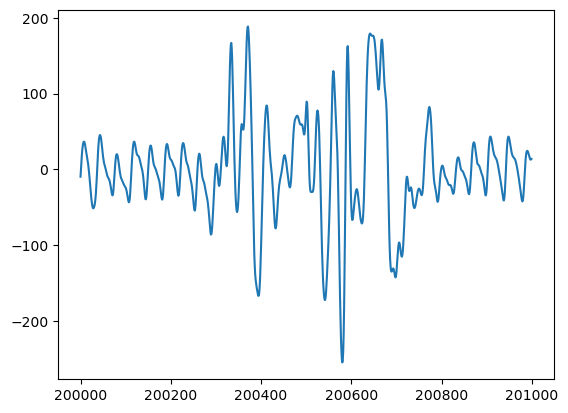

In [4]:
BVP_Midterm_2=BVP[BVP['Test']=='Midterm 2']
test=BVP_Midterm_2[BVP_Midterm_2['Subject']=='S5']
test[0].iloc[200000:201000].plot() #Plot some data

In [ ]:
#How do i want to modify the data? Midterm 2=Lowest Scores...performance under Stress Conditions?
    #Look up data augmentation for 1D data...it is used in image recognition but perhaps I can do something similar
    #with time series data

#First lets build a classifier to see if it can classifiy between the different tests...Essentially identical
    #cconditions. Interesting to see if physiological data can differentiate between exames
    
#Validate the classification model of subjects again with appropriate data

#Subsample to cluster data and create samples...Use Autoencoder to filter out noise
    #Subsample all the 70-80% scores, all 80-90% etc. and see if clustering analysis can detect anything
    
#Build general model, fine tune for individuals...

In [5]:
from sklearn.utils import resample

In [30]:
def equal_samples(df, unique_indexes): #DONT USE..INCORRECTLY MODIFIES SAMPLE RATES
    resampled_dfs = []
    for subject_value in unique_indexes:
        frame = df[df['Subject'] == subject_value]
        df_resampled = resample(frame, replace=True, n_samples=int(len(df)/10))
        resampled_dfs.append(df_resampled)
    resampled_df = pd.concat(resampled_dfs)
    return resampled_df

In [6]:
length=len(BVP) #resample all data to 64 Hz

signals=[BVP, ACC, EDA, TEMP, HR] #Removing IBI Data due to inconsistenscies

signals=[resample(i, replace=True, n_samples=length) for i in signals]

In [7]:
BVP=signals[0]
ACC=signals[1]
EDA=signals[2]
TEMP=signals[3]
HR=signals[4]

signals=[i.sort_index().reset_index(drop=True) for i in signals]

BVP=signals[0]
ACC=signals[1]
EDA=signals[2]
TEMP=signals[3]
HR=signals[4]

In [9]:
EDA['Subject'].value_counts() #Keeps correct proportion of samples...between subject variability

S2     3275560
S6     3154274
S3     3093343
S10    3054781
S1     2926028
S7     2742547
S4     2623260
S9     2514975
S5     2513246
S8     2472504
Name: Subject, dtype: int64

In [23]:
big_test=pd.concat([signals[0], signals[1]], axis=1)
mapper=['BVP_Signal', 'BVP_Subject', 'BVP_Test', 'BVP_Score', 'x','y','z','ACC_Subject', "ACC_Test", "ACC_Score"]
big_test.columns=mapper
big_test

In [27]:
big_test #Test dataframe to examine if data is imbalanced

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
...,...,...,...,...,...,...,...,...,...,...
28370513,-0.81,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370514,-0.89,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370515,-0.89,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370516,-1.09,S9,Final,0.63,36,-36,-34,S9,Final,0.63


In [148]:
print(len(big_test[big_test['BVP_Subject']=='S1'])) #Not perfectly balanced but pretty similar amounts
print(len(big_test[big_test['ACC_Subject']=='S1']))

#Problem comes once I want to concatenate them all together, they need to have equal amounts

print(len(big_test[big_test['BVP_Test']=='Midterm 1'])) 
print(len(big_test[big_test['ACC_Test']=='Midterm 2']))

2928630
2926799
7538753
7747237


<AxesSubplot:>

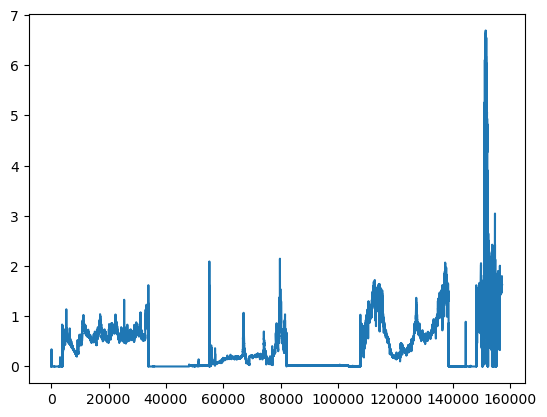

In [11]:
EDA_OG=pd.concat(final_dfs['EDA'], axis=0)
EDA_OG=EDA_OG.reset_index(drop=True)
EDA_OG=EDA_OG.reset_index(drop=True)
EDA_OG[0][:157068].plot() #Data looks the same...good to go

<AxesSubplot:>

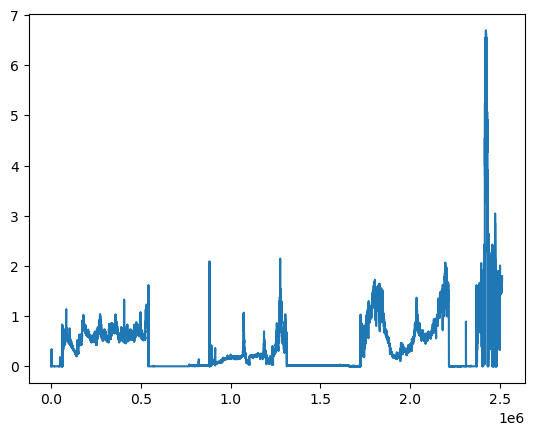

In [12]:
EDA[0][:2512834].plot() #Determined end point by index of which a specific subject ended

In [ ]:
#Successfully found way to resample data approprately...same amouint of samples within a 64Hz sample rate for all
    #signals within each subject...Amount of samples between subjects varies because subjects may have finished test
    #earlier...amount of samples between exams will also vary because tests takle different amount of time.
    

In [10]:
#Create a list of dfs for each signal for each test
signals_1=[i[i['Test']=='Midterm 1'] for i in signals]
signals_2=[i[i['Test']=='Midterm 2'] for i in signals]
signals_3=[i[i['Test']=='Final'] for i in signals]

In [8]:
#Function to resample to equal data points within subject for each each sensor but keeps proportions of data otherwise
    #same

def resample_to_equal_within_subject_sr(signals_list):
    samples=defaultdict(dict)
    names=['BVP', 'ACC', 'EDA', 'TEMP', 'HR']
    dict_lengths=[]
    for df in signals_list:
        sensor_lengths=df.groupby('Subject').size().to_dict()
        dict_lengths.append(sensor_lengths)
    for i in zip(names, dict_lengths):
        samples[i[0]]=i[1]
    df_min = pd.DataFrame(samples).min(axis=1) #Got minimum values each sensor for each subject to even sampling rate
    lengths=list(df_min)
    subjects=df_min.index.to_numpy()
    resampled_dfs = [resample(df[df['Subject']==subj], replace=True, n_samples=length) 
                 for df in signals_list for subj, length in zip(subjects, lengths) if subj in df['Subject'].unique()]
    return resampled_dfs #Will return list of 50 dfs, need to concatenate the ones of same sensor

In [11]:
print(len(signals_1[0][signals_1[0]['Subject']=='S5'])==len(signals_1[1][signals_1[1]['Subject']=='S5']))

result_1=resample_to_equal_within_subject_sr(signals_1)

print(len(result_1[0][result_1[0]['Subject']=='S5'])==len(result_1[1][result_1[1]['Subject']=='S5']))
#Quick way to check if function did what is was supposed to..should be true after result 1 is made

False
True


In [12]:
result_1 = [pd.concat(result_1[i:i+10]) for i in range(0, 50, 10)] #Concatenating dfs of same sensor
result_2=resample_to_equal_within_subject_sr(signals_2)
result_3=resample_to_equal_within_subject_sr(signals_3)
result_2 = [pd.concat(result_2[i:i+10]) for i in range(0, 50, 10)]
result_3 = [pd.concat(result_3[i:i+10]) for i in range(0, 50, 10)]

In [13]:
#Store data in case of dead kernel

%store result_1
%store result_2
%store result_3

Stored 'result_1' (list)
Stored 'result_2' (list)
Stored 'result_3' (list)


In [2]:
%store -r result_1
%store -r result_2
%store -r result_3

In [33]:
EDA_test=resample(EDA_OG, replace=True, n_samples=len(EDA_OG)*2)
EDA_test=EDA_test.sort_index() #Generic upsample by 2

final_EDA_test=resample(EDA_OG, replace=True, n_samples=length)
final_EDA_test=final_EDA_test.sort_index() #Actual upsample by 16

length=len(BVP)
upsampling_factor=int(length/len(EDA_OG))

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_12678/2172909222.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  EDA_test[0][10000*2:20000*2].plot(sharex=True)
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_12678/2172909222.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  final_EDA_test[0][10000*16:20000*16].plot(sharex=True) #Validate the resmapling method..all looks the same


<AxesSubplot:>

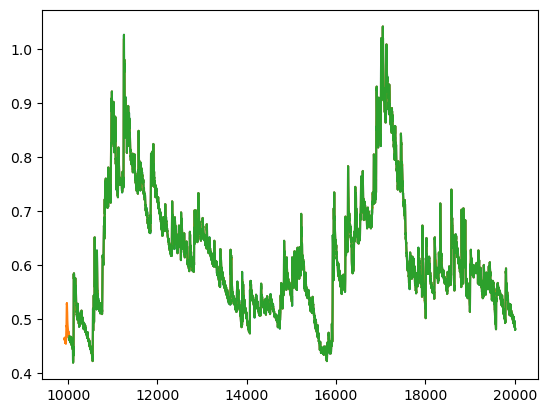

In [40]:
EDA_OG[0][10000:20000].plot(sharex=True)
EDA_test[0][10000*2:20000*2].plot(sharex=True)
final_EDA_test[0][10000*16:20000*16].plot(sharex=True) #Validate the resmapling method..all looks the same

In [101]:
print(EDA_OG[0].mean())
print(EDA_OG[0].std())

print(EDA_test[0].mean()) #Upsampled by factor of 2
print(EDA_test[0].std())

print(final_EDA_test[0].mean())
print(final_EDA_test[0].std()) #Updampled by factor of 16

0.26008439247089876
0.39807888302621985
0.26042640339035145
0.39908241674997
0.26011511339761245
0.3981227579880438


In [28]:
result_1

[              0 Subject       Test  Score
 12650351  -0.39      S1  Midterm 1   0.78
 12367434  -0.61      S1  Midterm 1   0.78
 12736472  -0.74      S1  Midterm 1   0.78
 12771860  -1.08      S1  Midterm 1   0.78
 12367711   0.29      S1  Midterm 1   0.78
 ...         ...     ...        ...    ...
 14901113  -0.47      S9  Midterm 1   0.80
 14967224 -11.74      S9  Midterm 1   0.80
 14976483   0.37      S9  Midterm 1   0.80
 14892874   2.43      S9  Midterm 1   0.80
 14511428   0.07      S9  Midterm 1   0.80
 
 [7526499 rows x 4 columns],
            0   1   2 Subject       Test  Score
 12286268  -2  64  11      S1  Midterm 1   0.78
 12932082  -3 -62  10      S1  Midterm 1   0.78
 12524729 -38   8  51      S1  Midterm 1   0.78
 12284405  -2  64  11      S1  Midterm 1   0.78
 12549578 -64  -8  -8      S1  Midterm 1   0.78
 ...       ..  ..  ..     ...        ...    ...
 14608328  -3  63  10      S9  Midterm 1   0.80
 15030032 -66   1 -21      S9  Midterm 1   0.80
 14931483 -40 -40 -16

In [14]:
#A) Develop model to train data on Midterm 1 and midterm 2 and predict final score

sample_1=result_1[0]

midterm_1_labels=sample_1[['Subject', 'Test', 'Score']]
midterm_1_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_1]
midterm_1_features=[i.reset_index(drop=True) for i in midterm_1_features]
midterm_1_labels=midterm_1_labels.reset_index(drop=True)

midterm_1_features=pd.concat(midterm_1_features, axis=1)

In [61]:
print(midterm_1_features.iloc[:,0].mean())
print(midterm_1_features.iloc[:,0].std())

0.0011962766275630545
9.175133099074737


In [15]:
#Repeat same code as above for midterm 2

sample_2=result_2[0]
midterm_2_labels=sample_2[['Subject', 'Test', 'Score']]

midterm_2_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_2]
midterm_2_features=[i.reset_index(drop=True) for i in midterm_2_features]
midterm_2_labels=midterm_2_labels.reset_index(drop=True)

midterm_2_features=pd.concat(midterm_2_features, axis=1)

In [62]:
print(midterm_2_features.iloc[:,0].mean())
print(midterm_2_features.iloc[:,0].std()) #Something to look at here, if the massive std difference
        #was a single subject and perhaps removing them from analysis. Also column at index 3 had big mean difference

0.007281551403504171
95.36223551146617


In [24]:
import math

def factors(n):
    factors = []
    for i in range(1, int(math.sqrt(n))+1): #+1 because range stops 1 number short
        if n % i == 0:
            factors.append(i)
            if i != n // i: #Check if perfect square root
                factors.append(n//i)
    return factors

In [18]:
#Developing and scaling features
model_1_features=pd.concat([midterm_2_features, midterm_1_features], axis=0)
model_1_features=preprocessing.StandardScaler().fit_transform(model_1_features)
model_1_features.shape

(15264469, 7)

In [19]:
model_1_features=model_1_features.reshape(-1,1,7) #Rehsape data

In [20]:
model_1_features.shape

(15264469, 1, 7)

In [70]:
model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)

In [96]:
#Developing labels for splices...with only one row this is not needed


model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)
modes=[]
for i in range(0, len(model_1_labels), 42):
    batch = model_1_labels[i:i+42]
    mode = stats.mode(batch)[0][0]
    # Append the mode to the new array
    modes.append(mode)
model_1_labels=np.asarray(modes)

In [73]:
model_1_labels=model_1_labels.to_numpy().reshape(-1,1)

In [74]:
model_1_labels.shape

(15262271, 1)

In [75]:
model_1_labels

array([[0.78],
       [0.78],
       [0.78],
       ...,
       [0.39],
       [0.39],
       [0.39]])

In [243]:
#A) Performance Prediction model

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(1, activation='relu')(x)

model_1=keras.Model(inputs=inputs, outputs=z, name='simple LSTM')

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

Model: "simple LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 256)            270336    
                                                                 
 dropout_17 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_36 (LSTM)              (None, 1, 128)            197120    
                                                                 
 dropout_18 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_37 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dropout_19 (Dropout)        (None, 1, 64)             

In [244]:
model_1_features=model_1_features.reshape(-1,1,7) #redoing the shape of input data because test data is different

In [246]:
model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)

In [248]:
model_1_labels=model_1_labels.to_numpy()

In [249]:
model_1.fit(model_1_features, model_1_labels, validation_split=0.2, epochs=3, batch_size=5000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
2443/2443 [==============================] - 239s 96ms/step - loss: 0.0094 - mae: 0.0713 - val_loss: 0.0948 - val_mae: 0.2678
Epoch 2/3
2443/2443 [==============================] - 239s 98ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.0885 - val_mae: 0.2594
Epoch 3/3
2443/2443 [==============================] - 253s 103ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.1010 - val_mae: 0.2755


In [21]:
#Develop the Test Set (i.e finals scores)

test=result_3[0]

final_labels=test[['Subject', 'Test', 'Score']]
final_x_test=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_3]
final_x_test=[i.reset_index(drop=True) for i in final_x_test]
final_y_test=final_labels.reset_index(drop=True)
final_x_test=pd.concat([i for i in final_x_test], axis=1)

In [22]:
final_x_test=preprocessing.StandardScaler().fit_transform(final_x_test)
final_x_test=final_x_test.reshape(-1,1,7)

final_x_test.shape

(13073764, 1, 7)

In [23]:
final_y_test=final_labels['Score'].to_numpy()
final_y_test=final_y_test.reshape(-1,1)
final_y_test.shape

(13073764, 1)

In [252]:
model_1.evaluate(x=final_x_test, y=final_y_test, verbose=1, batch_size=1000)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13072/13072 [==============================] - 272s 21ms/step - loss: 0.0207 - mae: 0.1285


[0.020731130614876747, 0.12848584353923798]

In [253]:
final_grades_predictions=model_1.predict(final_x_test, batch_size=1000)

13072/13072 [==============================] - 222s 17ms/step


In [273]:
final_grades_predictions=final_grades_predictions.flatten()

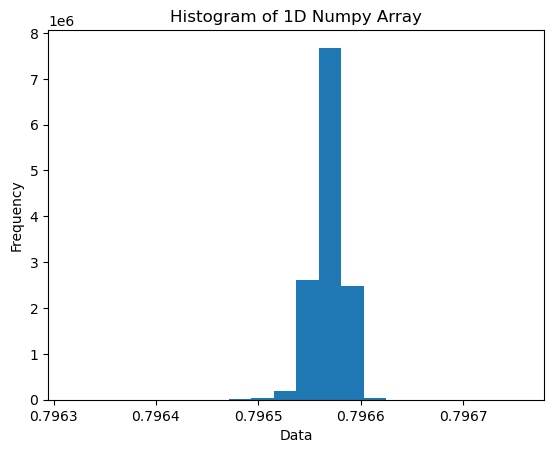

In [274]:
plt.hist(final_grades_predictions, bins=20) #Highly unrealistic predictions...all lumped aorund one number to minimize
            #mae

plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Performance Predictions with all Scores Included')
plt.show()`

In [278]:
#A2) 2nd Performance Prediction Model..more complex architecture

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.Dense(256, activation='relu')(inputs)
y=keras.layers.GRU(256, return_sequences=True)(x)

attention=keras.layers.Attention()([x,y])

x=keras.layers.Dense(128, activation='relu')(attention)
y=keras.layers.GRU(128, return_sequences=True)(x)

attention2=keras.layers.Attention()([x,y])

x=keras.layers.GRU(64)(attention2)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
x=keras.layers.Dense(1, activation='relu')(x)

model_2=keras.Model(inputs=inputs, outputs=x, name='GRU Attention')

model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "GRU Attention"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 1, 7)]       0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 1, 256)       2048        ['input_19[0][0]']               
                                                                                                  
 gru_6 (GRU)                    (None, 1, 256)       394752      ['dense_55[0][0]']               
                                                                                                  
 attention_12 (Attention)       (None, 1, 256)       0           ['dense_55[0][0]',               
                                                                  'gru_6[0][0]']      

In [279]:
model_1_labels

array([0.78, 0.78, 0.78, ..., 0.39, 0.39, 0.39])

In [280]:
model_2.fit(model_1_features, model_1_labels, batch_size=10000, verbose=1, epochs=3)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
1527/1527 [==============================] - 246s 160ms/step - loss: 0.0191 - mae: 0.1023
Epoch 2/3
1527/1527 [==============================] - 235s 154ms/step - loss: 0.0133 - mae: 0.0825
Epoch 3/3
1527/1527 [==============================] - 226s 148ms/step - loss: 0.0120 - mae: 0.0768


In [281]:
final_grades_predictions2=model_2.predict(final_x_test, batch_size=10000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1308/1308 [==============================] - 55s 42ms/step


In [282]:
final_grades_predictions2 #More realistic range of predictions but worse mae performance

array([[0.7592111 ],
       [0.67758113],
       [0.76907057],
       ...,
       [0.7787059 ],
       [0.7328728 ],
       [0.80576503]], dtype=float32)

In [288]:
model_2.evaluate(final_x_test, final_y_test, batch_size=10000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1308/1308 [==============================] - 55s 42ms/step - loss: 0.0213 - mae: 0.1308


[0.021272964775562286, 0.13077592849731445]

In [119]:
#A3) Performance Predictions with less of a range of values

        #Step 1: Cut the range of scores...lets try and predict the top 50% of scores...define the top 50% of scores
    
greater_50_1=[i[i['Score']>i['Score'].mean()] for i in result_1]
greater_50_2=[i[i['Score']>i['Score'].mean()] for i in result_2]
greater_50_3=[i[i['Score']>i['Score'].mean()] for i in result_3]

greater_50_1=[i.sort_index().reset_index(drop=True) for i in greater_50_1]
greater_50_2=[i.sort_index().reset_index(drop=True) for i in greater_50_2]
greater_50_3=[i.sort_index().reset_index(drop=True) for i in greater_50_3]

greater_50_1_labels=greater_50_1[0]['Score']
greater_50_2_labels=greater_50_2[0]['Score']
greater_50_3_labels=greater_50_3[0]['Score']

greater_50_1_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in greater_50_1]
greater_50_2_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in greater_50_2]
greater_50_3_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in greater_50_3]

greater_50_1_features=pd.concat(greater_50_1_features, axis=1)
greater_50_2_features=pd.concat(greater_50_2_features, axis=1)
X_test=pd.concat(greater_50_3_features, axis=1)

In [151]:
#Normalize data

model_3A_features=pd.concat([greater_50_1_features, greater_50_2_features], axis=0)
model_3A_features=preprocessing.StandardScaler().fit_transform(model_3A_features)

X_test=preprocessing.StandardScaler().fit_transform(X_test)
X_test=X_test.reshape(-1,1,7)

model_3A_labels=pd.concat([greater_50_1_labels, greater_50_2_labels], axis=0).to_numpy().reshape(-1,1)
model_3A_features=model_3A_features.reshape(-1,1,7)

y_test=y_test=greater_50_3_labels.to_numpy().reshape(-1,1)

In [164]:
#Model 3A...simple LSTM

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(1, activation='relu')(x)

model_3A=keras.Model(inputs=inputs, outputs=z)

model_3A.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_3A.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 7)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 256)            270336    
                                                                 
 dropout_3 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout_5 (Dropout)         (None, 1, 64)             0     

In [165]:
model_3A.fit(model_3A_features, model_3A_labels, batch_size=1000, epochs=3, validation_split=.2, verbose=1)

Epoch 1/3


2023-01-23 08:40:09.207291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:40:09.773359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:40:09.907234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:40:09.957135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:40:10.450049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:40:10.580932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/6595 [..............................] - ETA: 8:53:59 - loss: 0.6959 - mae: 0.8325

2023-01-23 08:40:10.695058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6595/6595 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0320

2023-01-23 08:43:21.801043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:43:21.940680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:43:21.981938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:43:22.029774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6595/6595 [==============================] - 217s 32ms/step - loss: 0.0028 - mae: 0.0320 - val_loss: 0.0031 - val_mae: 0.0456
Epoch 2/3
6595/6595 [==============================] - 210s 32ms/step - loss: 6.5065e-04 - mae: 0.0157 - val_loss: 0.0030 - val_mae: 0.0436
Epoch 3/3
3395/6595 [==============>...............] - ETA: 1:33 - loss: 4.8381e-04 - mae: 0.0127

KeyboardInterrupt: 

In [168]:
model_3A_predictions=model_3A.predict(X_test, batch_size=1000, verbose=1)

2023-01-23 08:50:41.232805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:50:41.383282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   4/7441 [..............................] - ETA: 2:13   

2023-01-23 08:50:41.465544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 08:50:41.542091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7441/7441 [==============================] - 85s 11ms/step


In [180]:
model_3A_predictions.max()

0.9607349

In [193]:
model_3A_labels.min()

0.77

In [179]:
y_test.max()

0.94

In [175]:
model_3A.evaluate(X_test, y_test, verbose=1, batch_size=1000)

7441/7441 [==============================] - 100s 13ms/step - loss: 0.0066 - mae: 0.0661


[0.0066494871862232685, 0.06613480299711227]

In [200]:
#Test model 3A on unseen data that is within the range of labels it saw...75% on midterm_1

test=[i[i['Score']==.75] for i in result_1] #S4 scored 75% on midterm 1 and model did not see their data
test=[i.sort_index().reset_index(drop=True) for i in test]
test_labels=test[0]['Score']
test_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in greater_50_1]
test_features=pd.concat(test_features, axis=1)

test_labels=test_labels.to_numpy().reshape(-1,1)
test_features=preprocessing.StandardScaler().fit_transform(test_features).reshape(-1,1,7)

In [203]:
unseen_predictions=model_3A.predict(test_features, verbose=1, batch_size=1000) 

#All the evidence we really need to show that this model doesn't work really well. What we can conclude is that
    #The physiological signals collected are not in any way directly realated to exam performance

3727/3727 [==============================] - 44s 12ms/step


array([[[0.8631384 ]],

       [[0.8631384 ]],

       [[0.8633057 ]],

       ...,

       [[0.8162212 ]],

       [[0.8164206 ]],

       [[0.81627923]]], dtype=float32)

In [207]:
final_labels

,Subject,Test,Score
23975931,S1,Final,0.91
24203567,S1,Final,0.91
24425037,S1,Final,0.91
23321584,S1,Final,0.91
24368511,S1,Final,0.91
...,...,...,...
27463650,S9,Final,0.63
27807383,S9,Final,0.63
28213716,S9,Final,0.63
27914432,S9,Final,0.63


In [30]:
len(model_1_features)+len(final_x_test)

28338233

In [27]:
#B) Develop model to classify the exams
    #Step 1: Reorganize data
Model_B_features=np.concatenate((model_1_features, final_x_test), axis=0) #Used preprocessed features that were scaled

model_B_labels_1=midterm_1_labels['Test']
model_B_labels_2=midterm_2_labels['Test']
model_B_labels_3=final_labels['Test']

model_B_labels=pd.concat([model_B_labels_1, model_B_labels_2, model_B_labels_3], axis=0)

model_B_labels=model_B_labels.to_numpy().reshape(-1,1)
model_B_features=Model_B_features

In [46]:
#One hot encode teh labels

model_B_labels=preprocessing.LabelEncoder().fit_transform(model_B_labels)
model_B_labels=keras.utils.np_utils.to_categorical(model_B_labels)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
#Need to test/train split this data

X_train, X_test, y_train, y_test=train_test_split(model_B_features, model_B_labels, train_size=0.5)

In [51]:
#Model 1B) Classification of exam with Softmax..simple LSTM

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(3, activation='softmax')(x)

model_1B=keras.Model(inputs=inputs, outputs=z)

model_1B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1B.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 7)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 256)            270336    
                                                                 
 dropout_3 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0   

In [53]:
model_1B.fit(X_train, y_train, epochs=3, validation_split=0.2, batch_size=1000, verbose=1)

Epoch 1/3


2023-01-23 15:01:00.229928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:01:01.120645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:01:01.412845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:01:01.466860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:01:02.504197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:01:02.632376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    2/11336 [..............................] - ETA: 13:02 - loss: 1.0984 - accuracy: 0.3650   

2023-01-23 15:01:02.735197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11336/11336 [==============================] - ETA: 0s - loss: 0.4766 - accuracy: 0.8040

2023-01-23 15:05:42.470085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:05:42.605009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:05:42.651910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:05:42.721732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11336/11336 [==============================] - 315s 27ms/step - loss: 0.4766 - accuracy: 0.8040 - val_loss: 0.3089 - val_accuracy: 0.8830
Epoch 2/3
11336/11336 [==============================] - 331s 29ms/step - loss: 0.3393 - accuracy: 0.8714 - val_loss: 0.2788 - val_accuracy: 0.8946
Epoch 3/3
11336/11336 [==============================] - 320s 28ms/step - loss: 0.3005 - accuracy: 0.8866 - val_loss: 0.2308 - val_accuracy: 0.9132


In [54]:
model_1B.evaluate(X_test, y_test, batch_size=1000, verbose=1)

14170/14170 [==============================] - 173s 12ms/step - loss: 0.2309 - accuracy: 0.9132


[0.23087038099765778, 0.9131582379341125]

In [55]:
model_1B_predictions=model_1B.predict(X_test, batch_size=1000)

2023-01-23 15:26:08.526650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:26:08.759794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:26:09.128791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-23 15:26:09.304944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14170/14170 [==============================] - 127s 9ms/step


In [61]:
model_1B_predictions=np.round(model_1B_predictions)

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [81]:
#For confusuion matrix to work, must return one hot encoded variables to string

test_labels=np.argmax(y_test, axis=1)

model_1B_predictions=np.argmax(model_1B_predictions, axis=1)


confusion_matrix(test_labels, model_1B_predictions)

array([[6206127,  224589,  108244],
       [ 331670, 3245636,  186236],
       [ 185240,  218809, 3462566]])

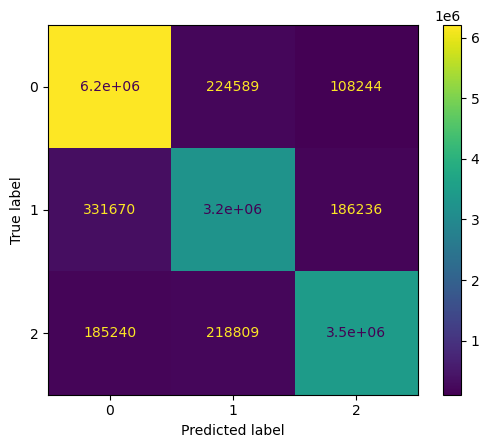

In [82]:
ConfusionMatrixDisplay.from_predictions(test_labels, model_1B_predictions)

In [102]:
result_1

[            0 Subject       Test  Score
 0       -0.00      S5  Midterm 1   0.67
 1       -0.00      S5  Midterm 1   0.67
 2       -0.00      S5  Midterm 1   0.67
 3       -0.00      S5  Midterm 1   0.67
 4       -0.00      S5  Midterm 1   0.67
 ...       ...     ...        ...    ...
 7528774  1.88      S9  Midterm 1   0.80
 7528775  1.69      S9  Midterm 1   0.80
 7528776  1.69      S9  Midterm 1   0.80
 7528777  1.69      S9  Midterm 1   0.80
 7528778  1.46      S9  Midterm 1   0.80
 
 [7528779 rows x 4 columns],
           0   1   2 Subject       Test  Score
 0        -1 -62  12      S5  Midterm 1   0.67
 1        -1 -62  12      S5  Midterm 1   0.67
 2        -1 -61  12      S5  Midterm 1   0.67
 3        -1 -61  12      S5  Midterm 1   0.67
 4        -1 -61  12      S5  Midterm 1   0.67
 ...      ..  ..  ..     ...        ...    ...
 7528774 -37   4  56      S9  Midterm 1   0.80
 7528775 -37   4  56      S9  Midterm 1   0.80
 7528776 -35   3  58      S9  Midterm 1   0.80
 752877

In [16]:
#Model 2B) Same Model, leave 1 or 2 subjects out and see if it is still capable of being accurate
    #Reorganize Data
    
result_1=[i.sort_index().reset_index(drop=True) for i in result_1]
result_2=[i.sort_index().reset_index(drop=True) for i in result_2]
result_3=[i.sort_index().reset_index(drop=True) for i in result_3]


holdout_1=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_1]
holdout_2=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_2]
holdout_3=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_3]

In [20]:
model_2B_f_1=[]
for df in result_1:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_2B_f_1.append(df_new)

In [21]:
model_2B_f_2=[]
for df in result_2:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_2B_f_2.append(df_new)

In [22]:
model_2B_f_3=[]
for df in result_3:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_2B_f_3.append(df_new)

In [25]:
#Develop train labels and data

model_2B_labels_1=model_2B_f_1[0]['Test']
model_2B_labels_2=model_2B_f_2[0]['Test']
model_2B_labels_3=model_2B_f_3[0]['Test']

train_labels=pd.concat([model_2B_labels_1, model_2B_labels_2, model_2B_labels_3], axis=0)

model_2B_f_1=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_2B_f_1]
model_2B_f_2=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_2B_f_2]
model_2B_f_3=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_2B_f_3]

f=[model_2B_f_1, model_2B_f_2, model_2B_f_3]
model_2B_features=[]
for i in f:
    x=pd.concat(i, axis=1)
    model_2B_features.append(x)

model_2B_features=pd.concat(model_2B_features, axis=0)

In [33]:
#Normalize features and one hot encode labels

model_2B_features=preprocessing.StandardScaler().fit_transform(model_2B_features)
model_2B_features=model_2B_features.reshape(-1,1,7)

train_labels=train_labels.to_numpy()
train_labels=preprocessing.LabelEncoder().fit_transform(train_labels)
train_labels=keras.utils.np_utils.to_categorical(train_labels)

In [39]:
X_train, X_test, y_train, y_test=train_test_split(model_2B_features, train_labels, train_size=0.5)

In [53]:
#Train Model 1B on data that is missing two subjects...didn't do well...61% accuracy on test data

history=model_1B.fit(model_2B_features, train_labels, epochs=1, validation_split=0.3, verbose=3, batch_size=1000)

KeyboardInterrupt: 

In [42]:
#Organizing holdout data

holdout_labels_1=holdout_1[0]['Test']
holdout_labels_2=holdout_2[0]['Test']
holdout_labels_3=holdout_3[0]['Test']

holdout_labels=pd.concat([holdout_labels_1, holdout_labels_2, holdout_labels_3], axis=0)

holdout_1=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_1]
holdout_2=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_2]
holdout_3=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_3]

h=[holdout_1, holdout_2, holdout_3]
holdout_features=[]
for i in h:
    x=pd.concat(i, axis=1)
    holdout_features.append(x)

holdout_features=pd.concat(holdout_features, axis=0)

,0,0,1,2,0,0,0
2312803,-0.00,-1,-62,13,0.0,21.81,104.00
2312804,-0.00,-1,-62,13,0.0,21.81,104.00
2312805,-0.00,-1,-62,13,0.0,21.81,104.00
2312806,-0.00,-1,-62,13,0.0,21.81,104.00
2312807,-0.00,-1,-62,13,0.0,21.81,104.00
...,...,...,...,...,...,...,...
10905186,-1.55,57,19,-10,0.0,26.47,128.53
10905187,-1.55,57,19,-10,0.0,26.47,128.53
10905188,-1.55,57,19,-10,0.0,26.47,128.53
10905189,-1.55,62,30,-10,0.0,26.47,128.53


In [45]:
holdout_features=preprocessing.StandardScaler().fit_transform(holdout_features)
holdout_features=holdout_features.reshape(-1,1,7)

holdout_labels=preprocessing.LabelEncoder().fit_transform(holdout_labels)
holdout_labels=keras.utils.np_utils.to_categorical(holdout_labels)

In [54]:
model_1B.evaluate(holdout_features, holdout_labels, batch_size=1000, verbose=1) #TERRRRIBLEEEEEEE AGHHHHHH

5771/5771 [==============================] - 70s 12ms/step - loss: 1.2198 - accuracy: 0.6127


[1.2198089361190796, 0.6127037405967712]

In [63]:
conv1d_labels=pd.concat([model_2B_labels_1, model_2B_labels_2, model_2B_labels_3], axis=0)

In [76]:
#2B) Conv1D for Exam Classification

time_step=64*4

f=[]
l=[]
for i in range(0, len(model_2B_features)-time_step, time_step):
    splc=model_2B_features[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(conv1d_labels.iloc[i:i+time_step])[0][0]
    l.append(l_splc)
    
conv1d_features=np.asarray(f).reshape(88146,256,7)
conv1d_labels=np.asarray(l).reshape(-1,1)

conv1d_labels=preprocessing.LabelEncoder().fit_transform(conv1d_labels)
conv1d_labels=keras.utils.np_utils.to_categorical(conv1d_labels)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_16471/4002559029.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l_splc=stats.mode(conv1d_labels.iloc[i:i+time_step])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_16471/4002559029.py:11: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  l_splc=stats.mode(conv1d_labels.iloc[i:i+time_step])[0][0]


In [99]:
# Model 2B) Conv1D for classification

inputs=tf.keras.Input(shape=(256,7))
x=keras.layers.Conv1D(64,3, activation='relu')(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv1D(64,3, activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv1D(64,3, activation='relu')(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(64, activation='relu')(x)
z=keras.layers.Dense(3, activation='softmax')(x)

model_2B=keras.Model(inputs=inputs, outputs=z)

model_2B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2B.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 7)]          0         
                                                                 
 conv1d_13 (Conv1D)          (None, 254, 64)           1408      
                                                                 
 dropout_15 (Dropout)        (None, 254, 64)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 252, 64)           12352     
                                                                 
 dropout_16 (Dropout)        (None, 252, 64)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 250, 64)           12352     
                                                                 
 flatten_3 (Flatten)         (None, 16000)             0   

In [100]:
model_2B.fit(conv1d_features, conv1d_labels, epochs=5, verbose=1, batch_size=1000, validation_split=0.2)

Epoch 1/5


2023-01-23 20:56:58.183165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - ETA: 0s - loss: 0.9068 - accuracy: 0.5878

2023-01-23 20:57:13.258371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 16s 210ms/step - loss: 0.9068 - accuracy: 0.5878 - val_loss: 1.7108 - val_accuracy: 0.5454
Epoch 2/5
71/71 [==============================] - 14s 193ms/step - loss: 0.5013 - accuracy: 0.7752 - val_loss: 1.2862 - val_accuracy: 0.6182
Epoch 3/5
71/71 [==============================] - 15s 211ms/step - loss: 0.4137 - accuracy: 0.8146 - val_loss: 1.5514 - val_accuracy: 0.5289
Epoch 4/5
71/71 [==============================] - 15s 209ms/step - loss: 0.3670 - accuracy: 0.8376 - val_loss: 1.9376 - val_accuracy: 0.5441
Epoch 5/5
71/71 [==============================] - 16s 226ms/step - loss: 0.3359 - accuracy: 0.8504 - val_loss: 1.6586 - val_accuracy: 0.5706


In [3]:
#1C) Develop model to classify the student...all students, assess a physiological pattern during a stressful exam

student_classifier_labels_1=result_1[0]['Subject'] #Labels
student_classifier_labels_2=result_2[0]['Subject']
student_classifier_labels_3=result_3[0]['Subject']

student_classifier_labels_1=student_classifier_labels_1.sort_index().reset_index(drop=True)
student_classifier_labels_2=student_classifier_labels_2.sort_index().reset_index(drop=True)
student_classifier_labels_3=student_classifier_labels_3.sort_index().reset_index(drop=True)

student_classifier_labels=pd.concat([student_classifier_labels_1, student_classifier_labels_2, 
                                     student_classifier_labels_3], axis=0)

model_1C_features_1=[i.drop(columns=['Subject', 'Score', 'Test']) for i in result_1] #Features
model_1C_features_2=[i.drop(columns=['Subject', 'Score', 'Test']) for i in result_2]
model_1C_features_3=[i.drop(columns=['Subject', 'Score', 'Test']) for i in result_3]

model_1C_features_1=[i.sort_index().reset_index(drop=True) for i in model_1C_features_1]
model_1C_features_2=[i.sort_index().reset_index(drop=True) for i in model_1C_features_2]
model_1C_features_3=[i.sort_index().reset_index(drop=True) for i in model_1C_features_3]

model_1C_features_1=pd.concat(model_1C_features_1, axis=1)
model_1C_features_2=pd.concat(model_1C_features_2, axis=1)
model_1C_features_3=pd.concat(model_1C_features_3, axis=1)

model_1C_features=pd.concat([model_1C_features_1, model_1C_features_2, model_1C_features_3], axis=0)

In [4]:
#Normalize, Reshape
model_1C_features=preprocessing.StandardScaler().fit_transform(model_1C_features) 

student_classifier_labels=student_classifier_labels.to_numpy()

#Splice Features
time_step=64

f=[]
l=[]
for i in range(0, len(model_1C_features)-time_step, time_step):
    splc=model_1C_features[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(student_classifier_labels[i:i+time_step])[0][0]
    l.append(l_splc)
    
splice_features=np.asarray(f).reshape(-1,256,7)
splice_labels=np.asarray(l)

#One hot Encode Labels
splice_labels=preprocessing.LabelEncoder().fit_transform(splice_labels)
splice_labels=keras.utils.np_utils.to_categorical(splice_labels)

#Train/Test Split

X_train, X_test, y_train, y_test=train_test_split(splice_features,splice_labels, train_size=0.5)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/811779242.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l_splc=stats.mode(student_classifier_labels[i:i+time_step])[0][0]
/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/811779242.py:14: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will

In [59]:
#Splice Features
time_step=64*4

f=[]
l=[]
for i in range(0, len(model_1C_features)-time_step, time_step):
    splc=model_1C_features[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(student_classifier_labels[i:i+time_step])[0][0]
    l.append(l_splc)
    
splice_features=np.asarray(f).reshape(-1,64,7)
splice_labels=np.asarray(l)

#One hot Encode Labels
splice_labels=preprocessing.LabelEncoder().fit_transform(splice_labels)
splice_labels=keras.utils.np_utils.to_categorical(splice_labels)

#Train/Test Split

X_train, X_test, y_train, y_test=train_test_split(splice_features,splice_labels, train_size=0.5)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/1060375764.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l_splc=stats.mode(student_classifier_labels[i:i+time_step])[0][0]
/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/1060375764.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will

In [31]:
#Model 1_C...simple LSTM for student classification

inputs=tf.keras.Input(shape=(64,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(10, activation='softmax')(x)

model_1C=keras.Model(inputs=inputs, outputs=z)

model_1C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1C.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 7)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 64, 256)           270336    
                                                                 
 dropout_15 (Dropout)        (None, 64, 256)           0         
                                                                 
 lstm_10 (LSTM)              (None, 64, 128)           197120    
                                                                 
 dropout_16 (Dropout)        (None, 64, 128)           0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0   

In [13]:
#Simple 1DCNN for Student Classification...all data...simple LSTM one row at a time produced decent results =88% acc
    #Model 1C_256

inputs=keras.layers.Input(shape=(256,7))
x=keras.layers.Conv1D(256,9, activation='relu')(inputs)
x=keras.layers.Conv1D(128,9, activation='relu')(x)
x=keras.layers.Dropout(0.5)(x)
x=keras.layers.Conv1D(56,9, activation='relu')(x)
x=keras.layers.Dropout(0.5)(x)
x=keras.layers.Conv1D(32,9)(x)
x=keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D")(x)

x=keras.layers.Flatten()(x)

z=keras.layers.Dense(10, activation='softmax')(x)

model_1C_256=keras.Model(inputs=inputs, outputs=z)

model_1C_256.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1C_256.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 7)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 248, 256)          16384     
                                                                 
 conv1d_7 (Conv1D)           (None, 240, 128)          295040    
                                                                 
 dropout_7 (Dropout)         (None, 240, 128)          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 232, 56)           64568     
                                                                 
 dropout_8 (Dropout)         (None, 232, 56)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 224, 32)           1616

In [65]:
#One line at a time LSTM...decent results for student classification=83-89% (3 epochs)
    #1 second at a time (64 time_steps)=(86% 21 epochs...still more improvement to be had with more epochs)

model_1C.fit(X_train, y_train, epochs=3, batch_size=1000, validation_split=0.2, verbose=1)

Epoch 1/3
178/178 [==============================] - 169s 949ms/step - loss: 0.4567 - accuracy: 0.8540 - val_loss: 0.9466 - val_accuracy: 0.7630
Epoch 2/3
178/178 [==============================] - 171s 960ms/step - loss: 0.5729 - accuracy: 0.8171 - val_loss: 0.4759 - val_accuracy: 0.8482
Epoch 3/3
178/178 [==============================] - 170s 954ms/step - loss: 0.4369 - accuracy: 0.8610 - val_loss: 0.4147 - val_accuracy: 0.8646


In [66]:
model_1C.evaluate(X_test, y_test, batch_size=1000)

222/222 [==============================] - 67s 302ms/step - loss: 0.4142 - accuracy: 0.8654


[0.4141741096973419, 0.8653996586799622]

In [15]:
#CNN 256 (4 sec) window...first set of hyperparameters reached about 80%

model_1C_256.fit(X_train, y_train, verbose=1, epochs=10, validation_split=0.2, batch_size=2000) 

Epoch 1/10
23/23 [==============================] - 32s 1s/step - loss: 0.6524 - accuracy: 0.7699 - val_loss: 0.9083 - val_accuracy: 0.7046
Epoch 2/10
23/23 [==============================] - 33s 1s/step - loss: 0.5497 - accuracy: 0.8095 - val_loss: 0.9167 - val_accuracy: 0.7073
Epoch 3/10
23/23 [==============================] - 34s 1s/step - loss: 0.5294 - accuracy: 0.8154 - val_loss: 1.0134 - val_accuracy: 0.6783
Epoch 4/10
23/23 [==============================] - 34s 1s/step - loss: 0.5404 - accuracy: 0.8111 - val_loss: 0.8088 - val_accuracy: 0.7324
Epoch 5/10
23/23 [==============================] - 42s 2s/step - loss: 0.4786 - accuracy: 0.8358 - val_loss: 0.8684 - val_accuracy: 0.7151
Epoch 6/10
23/23 [==============================] - 52s 2s/step - loss: 0.4861 - accuracy: 0.8299 - val_loss: 0.8059 - val_accuracy: 0.7354
Epoch 7/10
 4/23 [====>.........................] - ETA: 40s - loss: 0.5077 - accuracy: 0.8213

KeyboardInterrupt: 

In [12]:
model_1C_256.evaluate(X_test, y_test, batch_size=1000, verbose=1)


#Best model from 1C variants was LSTM either (1,7) or (64,7) after many epochs

56/56 [==============================] - 14s 257ms/step - loss: 0.6316 - accuracy: 0.7937


[0.6316099166870117, 0.7936516404151917]

In [72]:
#2C) Train model on midterm 1 and 2 and see if it can predict the student on final

    #Train data on midterm 1 and 2

    
model_2C_train_y=pd.concat([student_classifier_labels_1, student_classifier_labels_2], axis=0)

model_2C_train=pd.concat([model_1C_features_1, model_1C_features_2], axis=0)
model_2C_train=preprocessing.StandardScaler().fit_transform(model_2C_train)

time_step=64

f=[]
l=[]
for i in range(0, len(model_2C_train)-time_step, time_step):
    splc=model_2C_train[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(model_2C_train_y[i:i+time_step])[0][0]
    l.append(l_splc)
    
model_2C_train=np.asarray(f).reshape(-1,64,7)
model_2C_train_y=np.asarray(l)

model_2C_test=preprocessing.StandardScaler().fit_transform(model_1C_features_3)
model_2C_test_y=student_classifier_labels_3

f=[]
l=[]
for i in range(0, len(model_2C_test)-time_step, time_step):
    splc=model_2C_test[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(model_2C_test_y[i:i+time_step])[0][0]
    l.append(l_splc)
    
model_2C_test=np.asarray(f).reshape(-1,64,7)
model_2C_test_y=np.asarray(l)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/243504545.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  l_splc=stats.mode(model_2C_train_y[i:i+time_step])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/243504545.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l_splc=stats.mode(model_2C_train_y[i:i+time_step])[0][0]
/Users/j

In [80]:
#Label and one hot encode the train and test y

model_2C_train_y=preprocessing.LabelEncoder().fit_transform(model_2C_train_y)
model_2C_test_y=preprocessing.LabelEncoder().fit_transform(model_2C_test_y)

model_2C_train_y=keras.utils.np_utils.to_categorical(model_2C_train_y)
model_2C_test_y=keras.utils.np_utils.to_categorical(model_2C_test_y)

In [94]:
X_train, X_test, y_train, y_test=train_test_split(model_2C_train, model_2C_train_y, train_size=0.5)

In [97]:
model_2C_train=np.concatenate((X_train, X_test), axis=0)
model_2C_train_y=np.concatenate((y_train, y_test), axis=0)

In [88]:
#Model_2C: Student Classification by training on 2 exams and testing on 1

inputs=tf.keras.Input(shape=(64,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(10, activation='softmax')(x)

model_2C=keras.Model(inputs=inputs, outputs=z)

model_2C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2C.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 7)]           0         
                                                                 
 gru (GRU)                   (None, 64, 256)           203520    
                                                                 
 dropout_18 (Dropout)        (None, 64, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64, 128)           148224    
                                                                 
 dropout_19 (Dropout)        (None, 64, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_20 (Dropout)        (None, 64)                0   

In [99]:
model_2C.fit(model_2C_train, model_2C_train_y, verbose=1, epochs=3, validation_split=0.2, batch_size=1000)

Epoch 1/3
191/191 [==============================] - 130s 671ms/step - loss: 1.0500 - accuracy: 0.6638 - val_loss: 0.8935 - val_accuracy: 0.6963
Epoch 2/3
191/191 [==============================] - 125s 653ms/step - loss: 0.8884 - accuracy: 0.7047 - val_loss: 0.6980 - val_accuracy: 0.7696
Epoch 3/3
191/191 [==============================] - 122s 639ms/step - loss: 0.8846 - accuracy: 0.7066 - val_loss: 0.7189 - val_accuracy: 0.7568


In [100]:
model_2C.evaluate(model_2C_test, model_2C_test_y, batch_size=1000)

205/205 [==============================] - 45s 217ms/step - loss: 3.5453 - accuracy: 0.1453


[3.5453238487243652, 0.14527681469917297]

In [102]:
#3C) Transfer Learning: Train same model on only 8 subjects and then test do binary classification on two subjects
    #it hasn't seen...Will use CNN because faster and results are all pretty comparable

result_1=[i.sort_index().reset_index(drop=True) for i in result_1]
result_2=[i.sort_index().reset_index(drop=True) for i in result_2]
result_3=[i.sort_index().reset_index(drop=True) for i in result_3]

In [103]:
model_3C_f_1=[]
for df in result_1:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_3C_f_1.append(df_new)

In [104]:
model_3C_f_2=[]
for df in result_2:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_3C_f_2.append(df_new)

In [105]:
model_3C_f_3=[]
for df in result_3:
    df_new=df[~df['Subject'].isin(['S4','S6'])]
    model_3C_f_3.append(df_new)

In [106]:
#Develop train labels and data

model_3C_labels_1=model_3C_f_1[0]['Subject']
model_3C_labels_2=model_3C_f_2[0]['Subject']
model_3C_labels_3=model_3C_f_3[0]['Subject']

train_labels=pd.concat([model_3C_labels_1, model_3C_labels_2, model_3C_labels_3], axis=0)

model_3C_f_1=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_3C_f_1]
model_3C_f_2=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_3C_f_2]
model_3C_f_3=[i.drop(columns=['Subject', 'Test', 'Score']) for i in model_3C_f_3]

f=[model_3C_f_1, model_3C_f_2, model_3C_f_3]
model_3C_features=[]
for i in f:
    x=pd.concat(i, axis=1)
    model_3C_features.append(x)

model_3C_features=pd.concat(model_3C_features, axis=0)
model_3C_labels=pd.concat([model_3C_labels_1, model_3C_labels_2, model_3C_labels_3], axis=0)

In [110]:
#Organizing holdout data

holdout_1=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_1]
holdout_2=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_2]
holdout_3=[i[i['Subject'].isin(['S4', 'S6'])] for i in result_3]

holdout_labels_1=holdout_1[0]['Subject']
holdout_labels_2=holdout_2[0]['Subject']
holdout_labels_3=holdout_3[0]['Subject']

holdout_labels=pd.concat([holdout_labels_1, holdout_labels_2, holdout_labels_3], axis=0)

holdout_1=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_1]
holdout_2=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_2]
holdout_3=[i.drop(columns=['Subject', 'Test', 'Score']) for i in holdout_3]

h=[holdout_1, holdout_2, holdout_3]
holdout_features=[]
for i in h:
    x=pd.concat(i, axis=1)
    holdout_features.append(x)

holdout_features=pd.concat(holdout_features, axis=0)

In [143]:
#Splice Data

time_step=64*4

f=[]
l=[]
for i in range(0, len(model_3C_features)-time_step, time_step):
    splc=model_1C_features[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(model_3C_labels[i:i+time_step])[0][0]
    l.append(l_splc)
    
train_features=np.asarray(f).reshape(-1,time_step,7)
train_labels=np.asarray(l)

#Splice Features
time_step=64*4

f=[]
l=[]
for i in range(0, len(holdout_features)-time_step, time_step):
    splc=model_1C_features[i:i+time_step]
    f.append(splc)
    l_splc=stats.mode(holdout_labels[i:i+time_step])[0][0]
    l.append(l_splc)
    
test_features=np.asarray(f).reshape(-1,time_step,7)
test_labels=np.asarray(l)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/887706695.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  l_splc=stats.mode(model_3C_labels[i:i+time_step])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_906/887706695.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l_splc=stats.mode(model_3C_labels[i:i+time_step])[0][0]
/Users/jar

In [144]:
#Normalize Data and one hot encode

train_features=train_features.reshape(-1,7)
test_features=test_features.reshape(-1,7)

train_features=preprocessing.StandardScaler().fit_transform(train_features)
train_labels=preprocessing.LabelEncoder().fit_transform(train_labels)
train_labels=keras.utils.np_utils.to_categorical(train_labels)

test_features=preprocessing.StandardScaler().fit_transform(test_features)
test_labels=preprocessing.LabelEncoder().fit_transform(test_labels)

train_features=train_features.reshape(-1,256,7)
test_features=test_features.reshape(-1,256,7)

In [138]:
outer_model = keras.Sequential(
    [keras.layers.Input(shape=(256,7)),
     keras.layers.Conv1D(256,9, activation='relu'),
     keras.layers.Conv1D(128,9, activation='relu'),
     keras.layers.Dropout(0.5),
     keras.layers.Conv1D(56,9, activation='relu'),
     keras.layers.Dropout(0.5),
     keras.layers.Conv1D(32,9),
     keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"),
     keras.layers.Flatten()])
     
transfer_learning_3C_256_model=keras.Sequential([
    keras.Input(shape=(256,7)), outer_model, keras.layers.Dense(8, activation='softmax')])

transfer_learning_3C_256_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

transfer_learning_3C_256_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 3584)              392152    
                                                                 
 dense_22 (Dense)            (None, 8)                 28680     
                                                                 
Total params: 420,832
Trainable params: 420,832
Non-trainable params: 0
_________________________________________________________________


In [139]:
transfer_learning_3C_256_model.fit(train_features, train_labels, verbose=1, batch_size=500, validation_split=0.2, epochs=5)

Epoch 1/5


2023-01-25 07:00:38.947462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - ETA: 0s - loss: 1.3166 - accuracy: 0.5037

2023-01-25 07:01:48.750861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - 77s 537ms/step - loss: 1.3166 - accuracy: 0.5037 - val_loss: 3.2116 - val_accuracy: 0.1604
Epoch 2/5
142/142 [==============================] - 76s 535ms/step - loss: 0.9292 - accuracy: 0.6569 - val_loss: 3.4113 - val_accuracy: 0.2289
Epoch 3/5
142/142 [==============================] - 76s 536ms/step - loss: 0.7994 - accuracy: 0.7058 - val_loss: 3.7754 - val_accuracy: 0.2258
Epoch 4/5
142/142 [==============================] - 78s 549ms/step - loss: 0.7106 - accuracy: 0.7430 - val_loss: 3.8834 - val_accuracy: 0.2778
Epoch 5/5
142/142 [==============================] - 78s 551ms/step - loss: 0.6282 - accuracy: 0.7733 - val_loss: 4.0764 - val_accuracy: 0.2134


In [149]:
#Transfer learning...after training...outer_model.trainable=False and then train the final layer with a 
    #new sigmoid activation
    
outer_model.trainable=False

transfer_learning=keras.Sequential([keras.Input(shape=(256,7)), outer_model, 
                                    keras.layers.Dense(1, activation='sigmoid')])

transfer_learning.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

transfer_learning.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 3584)              392152    
                                                                 
 dense_25 (Dense)            (None, 1)                 3585      
                                                                 
Total params: 395,737
Trainable params: 3,585
Non-trainable params: 392,152
_________________________________________________________________


In [151]:
transfer_learning.fit(test_features, test_labels, verbose=1, epochs=5, batch_size=1000)

Epoch 1/5
23/23 [==============================] - 9s 389ms/step - loss: 0.4453 - accuracy: 0.7920
Epoch 2/5
23/23 [==============================] - 9s 381ms/step - loss: 0.4396 - accuracy: 0.7938
Epoch 3/5
23/23 [==============================] - 9s 393ms/step - loss: 0.4378 - accuracy: 0.7956
Epoch 4/5
23/23 [==============================] - 9s 407ms/step - loss: 0.4341 - accuracy: 0.7999
Epoch 5/5
23/23 [==============================] - 9s 393ms/step - loss: 0.4332 - accuracy: 0.7971


In [162]:
#Prep Data for same type of mdoel as above but LSTM

LSTM_transfer_X_train=preprocessing.StandardScaler().fit_transform(model_3C_features)
LSTM_transfer_y_train=preprocessing.LabelEncoder().fit_transform(model_3C_labels)
LSTM_transfer_y_train=keras.utils.np_utils.to_categorical(LSTM_transfer_y_train)

LSTM_X_test=preprocessing.StandardScaler().fit_transform(holdout_features)
LSTM_y_test=preprocessing.LabelEncoder().fit_transform(holdout_labels)
LSTM_y_test=keras.utils.np_utils.to_categorical(LSTM_y_test)

In [169]:
LSTM_transfer_X_train=LSTM_transfer_X_train.reshape(-1,1,7)

In [171]:
#Model 4C) Transfer Learning to Classify between individuals LSTM..trained on 8, one row at a time

outer_model_1 = keras.Sequential(
    [keras.layers.Input(shape=(1,7)),
     keras.layers.LSTM(256, return_sequences=True),
     keras.layers.LSTM(128, return_sequences=True),
     keras.layers.Dropout(0.5),
     keras.layers.LSTM(56, return_sequences=True),
     keras.layers.Dropout(0.5),
     keras.layers.LSTM(32)])
     
transfer_learning_4C_model=keras.Sequential([
    keras.Input(shape=(1,7)), outer_model_1, keras.layers.Dense(8, activation='softmax')])

transfer_learning_4C_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

transfer_learning_4C_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 32)                520288    
                                                                 
 dense_28 (Dense)            (None, 8)                 264       
                                                                 
Total params: 520,552
Trainable params: 520,552
Non-trainable params: 0
_________________________________________________________________


In [172]:
transfer_learning_4C_model.fit(LSTM_transfer_X_train, LSTM_transfer_y_train, verbose=1, epochs=3, batch_size=1000)

Epoch 1/3


2023-01-25 07:29:40.140409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.167304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.233973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.333138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.474820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.601076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-25 07:29:41.745655: I tensorflow/core/grappler/optimizers/cust

    1/22568 [..............................] - ETA: 32:38:11 - loss: 2.0794 - accuracy: 0.1300

2023-01-25 07:29:42.002361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22568/22568 [==============================] - 774s 34ms/step - loss: 0.6029 - accuracy: 0.7865
Epoch 2/3
  953/22568 [>.............................] - ETA: 11:51 - loss: 0.4284 - accuracy: 0.8548

KeyboardInterrupt: 

In [173]:
outer_model_1.trainable=False

transfer_learning_2=keras.Sequential([keras.Input(shape=(1,7)), outer_model_1, 
                                    keras.layers.Dense(1, activation='sigmoid')])

transfer_learning_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

transfer_learning_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 32)                520288    
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 520,321
Trainable params: 33
Non-trainable params: 520,288
_________________________________________________________________


In [175]:
LSTM_X_test=LSTM_X_test.reshape(-1,1,7)

In [178]:
LSTM_y_test=preprocessing.LabelEncoder().fit_transform(holdout_labels)

In [183]:
transfer_learning_2.fit(LSTM_X_test, LSTM_y_test, batch_size=1000, verbose=1, epochs=3)

Epoch 1/3
1214/5773 [=====>........................] - ETA: 1:01 - loss: 0.5732 - accuracy: 0.6938

KeyboardInterrupt: 

In [ ]:
#To get more data, I can look at low scores, high scores, middle scores and see where the data falls 
    #maybe try increase amount of data according to scores
    #Data Augmentation...make it realsitic of data in test set, does not help for it to be random
    #Can also synthesize training examples